# T-test
Goal: reject the null hypothesis which tells that the mean number of horror movies is the same when released in october or another season.

Step 1: compute the mean nb of horror movies in october

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import ast
from datetime import datetime

In [4]:
df = pd.read_csv('Data/movie.metadata.genres.tsv', sep='\t' )

display(df)

,Unnamed: 0,Wikipedia movieID,Freebase movieID,Movie name,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie release year,Movie release month,Movie release season,genre 1,genre 2
0,0,13388989,/m/03c3qdq,Pirate Gold,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,1,1,NaN,NaN
1,1,15839614,/m/03nwzrh,Hinemoa,NaN,24.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...",1913,3,2,Drama,NaN
2,2,14071789,/m/03cspdc,The Twelfth Juror,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,4,2,Drama,NaN
3,3,7709364,/m/0kvflk,In the Mountains of Virginia,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,10,4,NaN,NaN
4,4,13389288,/m/03c3qzt,Brothers,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}",1913,2,1,Drama,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41850,41850,36465188,/m/0h2h9tt,El Gringo,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}",2012,5,2,Action,NaN
41851,41851,35320614,/m/0j7jmy8,Live at the Machine Shop,NaN,67.0,"{""/m/02h40lc"": ""English Language""}",{},2012,3,2,NaN,NaN
41852,41852,34961787,/m/0j438k5,Romeo,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,7,3,Romance,NaN
41853,41853,34881832,/m/0j45hrp,Putta,NaN,NaN,"{""/m/09bnf"": ""Kannada Language""}","{""/m/03rk0"": ""India""}",2012,10,4,NaN,NaN


In [125]:
# Select all the rows which have month == 10 and (genre 1 == Horror or genre 2 == Horror)
nb_horror_october = df[(df['Movie release month'] == 10) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))].shape[0]

# Select all the rows which have month = 10
nb_movies_october = df[(df['Movie release month'] == 10)].shape[0]

# Select all the rows which have month != 10 and (genre 1 == Horror or genre 2 == Horror)
nb_horror_not_october = df[(df['Movie release month'] != 10) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))].shape[0]

# Select all the rows which have month != 10
nb_movies_not_october = df[(df['Movie release month'] != 10)].shape[0]


In [74]:
nb_horror_october

311

In [127]:
nb_horror_not_october/11

201.0

H0: the average nb of horror movies per year is the same when released in october or not.

In [130]:

nb_horror_october = df[(df['Movie release month'] == 10) & (df['Movie release year'] >= 1980)& ((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))] #.shape[0]
nb_horror_october_by_year = nb_horror_october.groupby(['Movie release year'])['Movie name'].count()
nb_horror_october_by_year.mean()

7.454545454545454

In [131]:
nb_horror_not_october = df[(df['Movie release month'] != 10) &  (df['Movie release year'] >= 1980)&((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))] #.shape[0]
nb_horror_not_october_by_year = nb_horror_not_october.groupby(['Movie release year'])['Movie name'].count()
np.round(nb_horror_not_october_by_year/11).mean()

4.424242424242424

Text(0.5, 1.0, 'Number of horror movies per year')

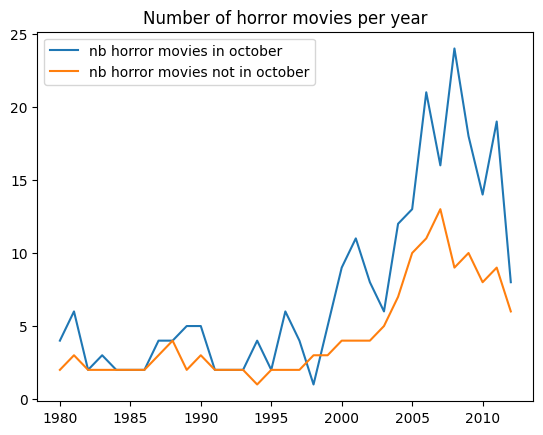

In [143]:
plt.plot(nb_horror_october_by_year,label="nb horror movies in october")
plt.plot(np.round(nb_horror_not_october_by_year/11),label="nb horror movies not in october")
plt.legend()
plt.title("Number of horror movies per year")

In [139]:
#plt.boxplot(nb_horror_october_by_year)

In [150]:
import scipy.stats 
display(scipy.stats.ttest_ind(nb_horror_october_by_year, np.round(nb_horror_not_october_by_year/11)))

TtestResult(statistic=2.4539877300613493, pvalue=0.016859984448267924, df=64.0)

In [145]:
nb_horror_not_october_2010 = df[(df['Movie release month'] != 10) & (df['Movie release year'] == 1980) & ((df['genre 1']=='Horror') | 
                                                        (df['genre 2']=='Horror'))].shape[0]
nb_horror_not_october_2010/11

2.272727272727273

In [38]:
# Ratio of horror movies in october
ratio_horror_october = nb_horror_october / nb_movies_october
ratio_horror_october

0.0751207729468599

In [39]:
# Ratio number of horror movies not in october
ratio_horror_not_october = nb_horror_not_october / nb_movies_not_october
ratio_horror_not_october

0.05862388969905873

T-test


H0: "The average box office of a horror movie released in october is equal to the average box office of a horror movie not released in october."

In [113]:
box_office_horror_october = df[(df['Movie release month'] == 10) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))]['Movie box office revenue'].dropna()
box_office_horror_october.mean()

48349876.21686747

In [70]:
box_office_horror_not_october = df[((df['Movie release month'] != 10)) & ((df['genre 1']=='Horror') | (df['genre 2']=='Horror'))]['Movie box office revenue'].dropna()
box_office_horror_not_october.mean()

54751463.45810056

In [73]:
import scipy.stats 
display(scipy.stats.ttest_ind(box_office_horror_october, box_office_horror_not_october))

TtestResult(statistic=-0.5646656085308688, pvalue=0.5725061226007546, df=618.0)